## Interventions for Questions where diagram is Essential

Numbers:
1. No Errors: 24
2. Calculation Error: 1
3. Conceptual Error: 9
4. Misread Diagram: 12

Total: 46
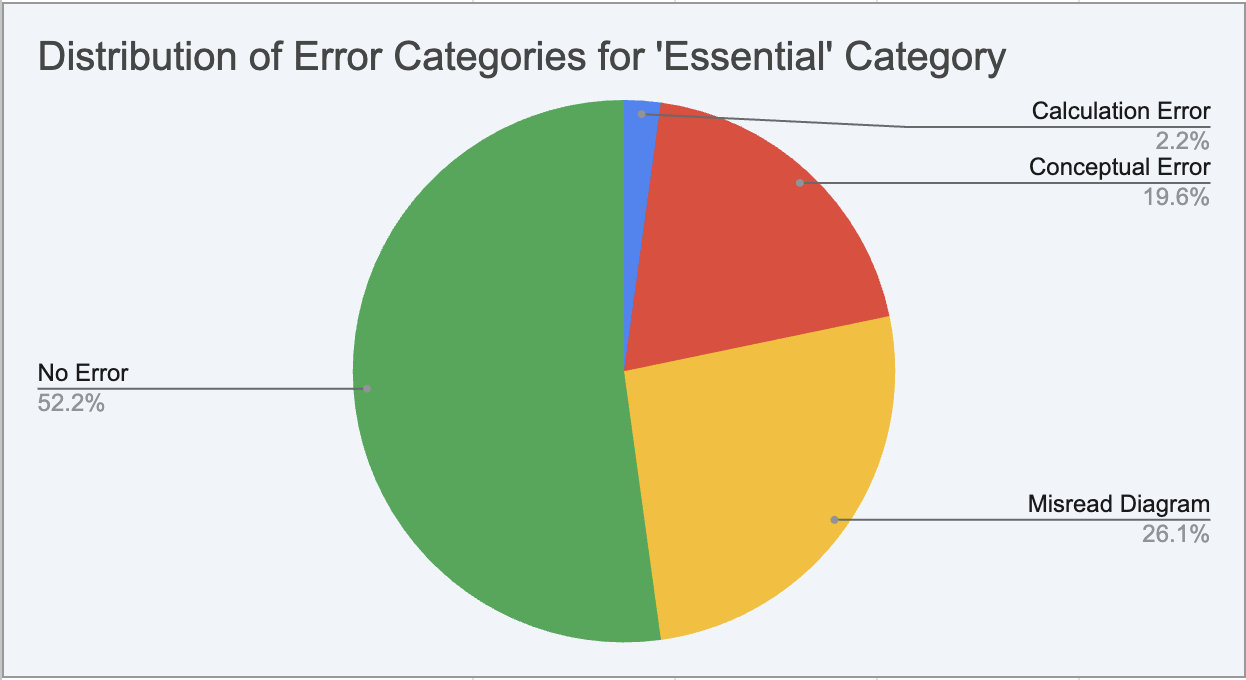

## Boilerplate Code

In [1]:
import json
import os
from dotenv import load_dotenv
import json
from pathlib import Path
from openai import OpenAI
import base64, mimetypes
from IPython.display import Image, display
import time
import pandas as pd
import gspread
from google.colab import auth
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
from google.colab import drive
drive.mount('/content/drive')
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')
import cv2

Mounted at /content/drive


In [2]:
history = []
client = OpenAI(api_key=OPENAI_API_KEY)
def reset_history(system_message=""):
    """Reset chat history with a fresh system prompt."""
    global history
    history = [
        {
            "role": "system",
            "content": [
                {"type": "input_text", "text": system_message}
            ],
        }
    ]
    return history


# Initialize default history
reset_history()


# -------------------------
# Helper: Encode images → data URLs
# -------------------------
def encode_images(image_paths):
    blocks = []
    for img_path in image_paths or []:
        mime, _ = mimetypes.guess_type(img_path)
        mime = mime or "image/png"
        with open(img_path, "rb") as f:
            b64 = base64.b64encode(f.read()).decode("utf-8")
        data_url = f"data:{mime};base64,{b64}"
        blocks.append({"type": "input_image", "image_url": data_url})
    return blocks


# -------------------------
# Chat Turn Function (images optional)
# -------------------------
def chat_turn(user_message: str, image_paths=None):
    # Build user's message content
    content_blocks = encode_images(image_paths)
    content_blocks.append({"type": "input_text", "text": user_message})

    # Add to history
    history.append({
        "role": "user",
        "content": content_blocks,
    })

    # Call model with all previous turns
    response = client.responses.create(
        model="gpt-5",
        input=history,
        reasoning={"effort": "low"},
        text={"verbosity": "low"}
    )

    # Extract assistant text response
    assistant_text = response.output_text

    # Append back into history
    history.append({
        "role": "assistant",
        "content": [
            {"type": "output_text", "text": assistant_text}
        ],
    })

    return assistant_text

## Misread Diagram

###Q53

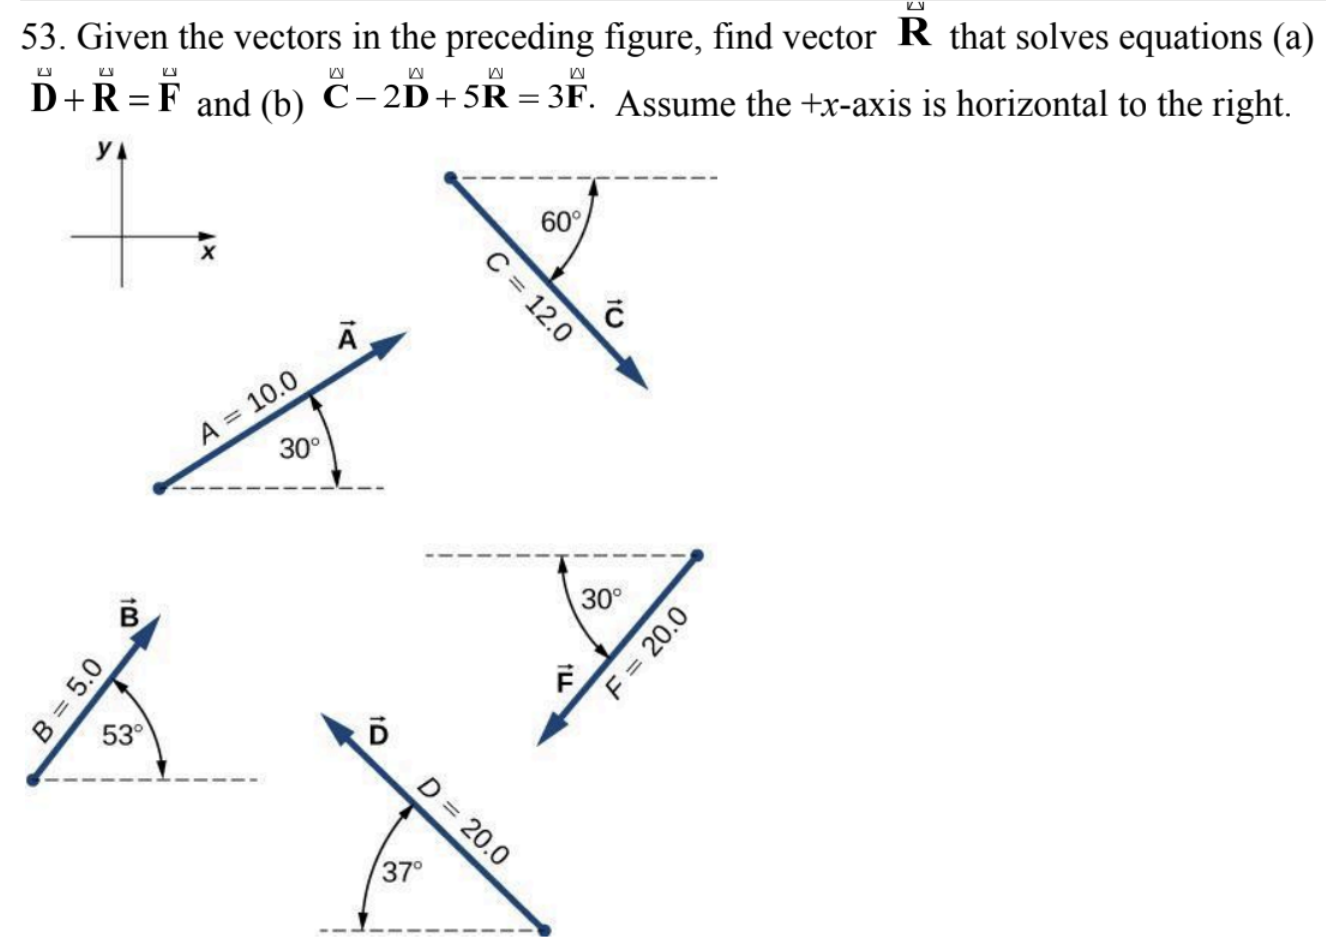

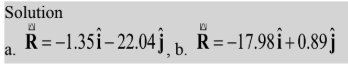

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_2_Vectors_4/53/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- A reference x–y axis is shown (+x to the right, +y up).
- Five vectors are drawn with magnitudes and angles:
  - A: magnitude 10.0, pointing up and to the right, 30° above the +x-axis.
  - B: magnitude 5.0, pointing up and to the right, 53° above the +x-axis.
  - C: magnitude 12.0, pointing down and to the right, 60° below the +x-axis.
  - D: magnitude 20.0, pointing down and to the right; its angle is 37° from the +y-axis (i.e., 53° below the +x-axis).
  - F: magnitude 20.0, pointing down and to the left, 30° below the negative x-direction (i.e., 150° from +x).


In [ ]:
prompt = (
        "Corrections: "
        "1. Vector D is pointing up-and-left ; its angle is 37 from -x-axis"
    )
resp = chat_turn(prompt)
print(resp)

Noted. Revised description of D:
- D: magnitude 20.0, pointing up and to the left; its direction is 37° above the −x-axis (i.e., 143° measured from +x).


In [ ]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

Using components (units): 
- C = (6.00, −10.392) 
- D = (−15.973, 12.036) 
- F = (−17.321, −10.000)

(a) D + R = F → R = F − D = (−1.35, −22.04) 
- |R| ≈ 22.1, direction ≈ −93.5° from +x (≈3.5° left of straight down).

(b) C − 2D + 5R = 3F → R = (3F − C + 2D)/5 = (−17.98, 0.893) 
- |R| ≈ 18.0, direction ≈ 177.1° from +x (≈2.9° above −x).


In [ ]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###95

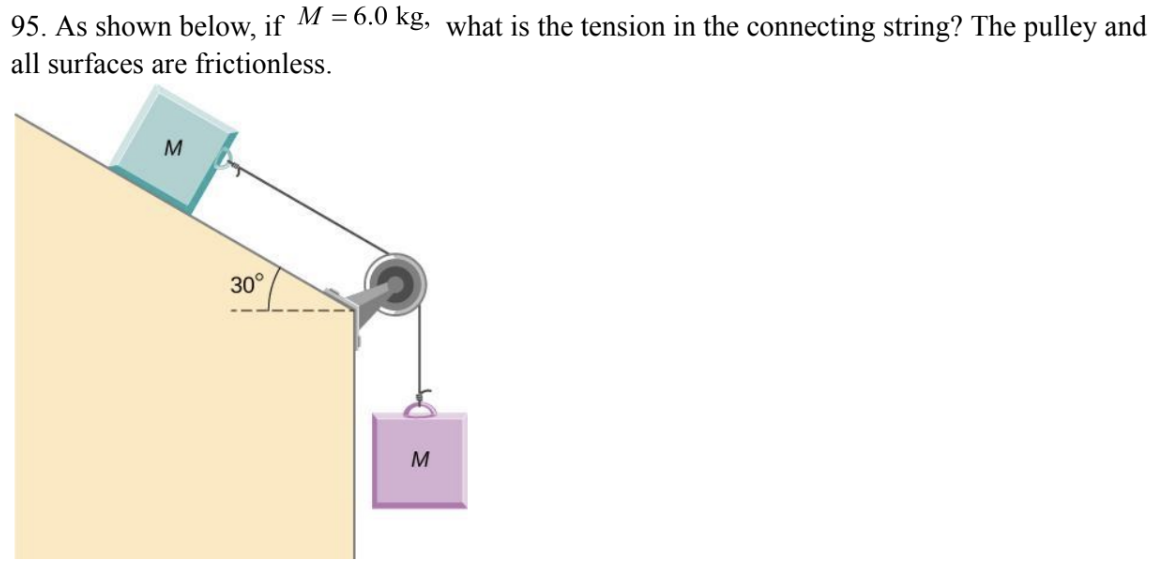

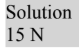

In [4]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_6_Applications_of_Newton_Laws_15/95/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- A frictionless 30° incline on the left with a block labeled M resting on it.
- The block is attached to a light string that runs up the slope to a pulley mounted at the top edge.
- The string passes over the frictionless pulley and supports a second block (also labeled M) hanging vertically on the right.


In [5]:
prompt = (
        "Corrections: "
        "If the block that hangs vertically moves downward then the block on the incline will move downward along the slope (not upward) "
    )
resp = chat_turn(prompt)
print(resp)

You're right—the rope runs from the block down the slope to the pulley, so if the hanging mass moves downward, the tension pulls the block down the incline as well (not up).


In [6]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

T = 14.7 N

Reason: Take motion downward for both masses.
- On incline: M a = M g sin30° + T
- Hanging mass: M a = M g − T
Add: 2 M a = M g (1 + sin30°) ⇒ a = 0.75 g
Then T = M(g − a) = M(0.25 g) = 6×9.8/4 ≈ 14.7 N.


In [7]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###101

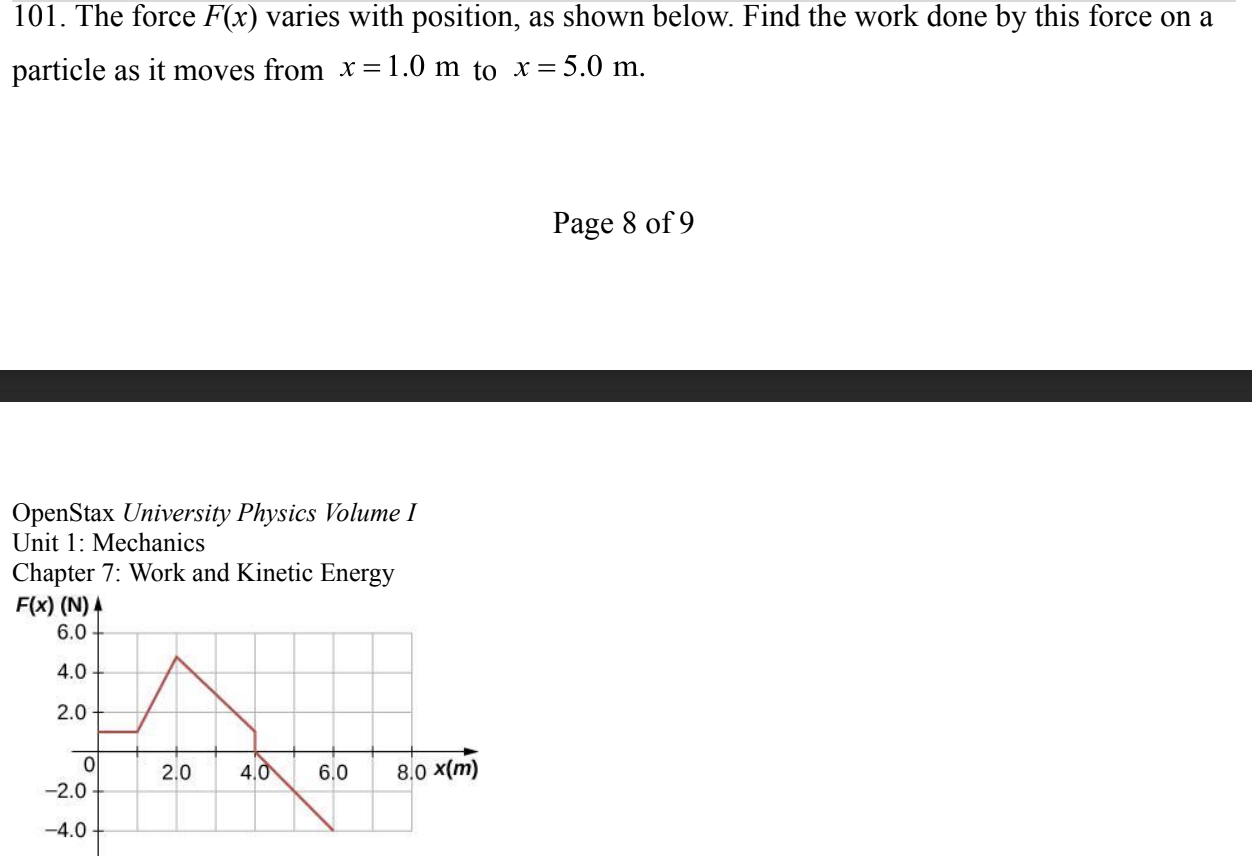

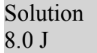

In [7]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_7_Work_and_Kinetic_Energy_4/101/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- It’s a force–position graph, F(x) in newtons vs x in meters (0–8 m).
- F(x) is piecewise linear:
  - From x=0 to 2 m it rises from about 1 N to 5 N (peak at x≈2 m).
  - From x=2 to 4 m it decreases linearly to about 1 N.
  - From x=4 to 6 m it continues downward, crossing F=0 near x=5 m and reaching about −4 N at x≈6 m.
- The problem asks for the work done as the particle moves from x=1.0 m to x=5.0 m.


In [9]:
prompt = (
        "Corrections: "
        "From x = 0 to x = 1.0 m: The force is constant at F = 1.0 N (horizontal line) "
        "From x=1 to 2 m it rises from about 1 N to 5 N (peak at x≈2 m)."
        "At x=4 the force drops from 1 to 0. Then from x=4 to x=6 force linearly decreases from 0 to -4 "
    )
resp = chat_turn(prompt)
print(resp)

Updated description:

- 0 ≤ x < 1 m: F(x) = 1 N (horizontal line).
- 1 ≤ x ≤ 2 m: F increases linearly from 1 N to 5 N, peaking at 5 N at x = 2 m.
- 2 ≤ x ≤ 4 m: F decreases linearly from 5 N to 1 N.
- At x = 4 m: F drops abruptly from 1 N to 0.
- 4 ≤ x ≤ 6 m: F decreases linearly from 0 to −4 N (crosses negative).


In [10]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

8 J


In [11]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###49

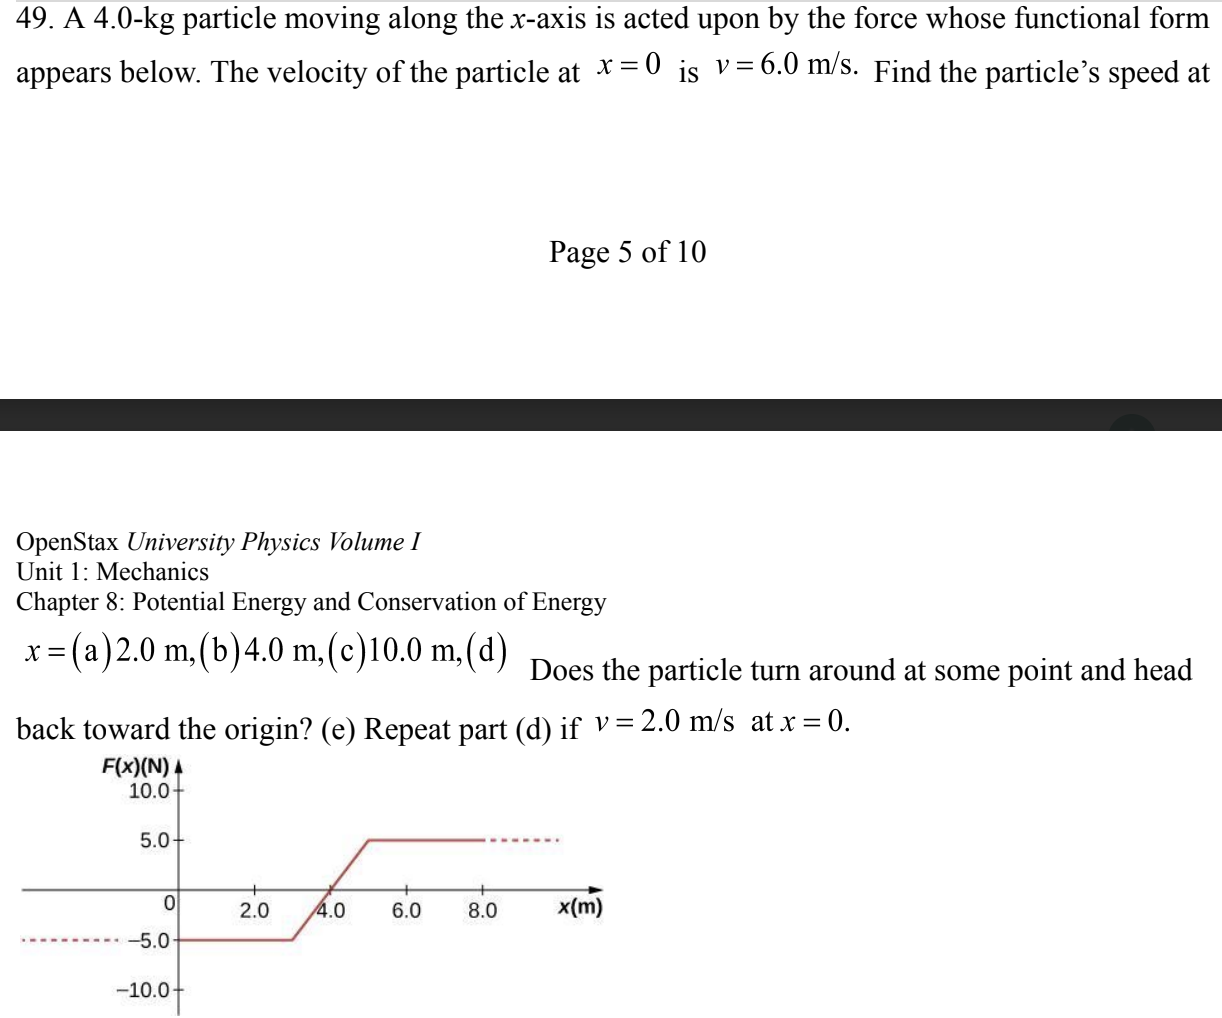

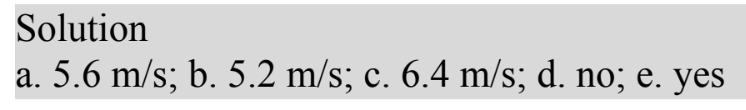

In [12]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_8_Potential_Energy_and_Conservation_of_energy_6/49/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- It’s a Force vs. position graph: F(x) in N on the vertical axis, x in meters on the horizontal.
- Piecewise force:
  - F = 0 from x = 0 to 2 m.
  - From x = 2 to 4 m, F decreases linearly from 0 to about −5 N.
  - From x = 4 to 6 m, F increases linearly from −5 N to +5 N (crossing F = 0 near x ≈ 5 m).
  - From x = 6 to 10 m, F is constant at +5 N.


In [14]:
prompt = (
        "Corrections: "
        "From x = 0 to x = 3 m: The force is constant at F = -5.0 N (horizontal line) "
        "From x=3 to 5 m it rises from about -5 N to 5 N "
        "At x=5 onwards the force is constant at F = 5.0 N (horizontal line) "
    )
resp = chat_turn(prompt)
print(resp)

Got it. The figure is an F(x) vs x graph with:
- F = −5 N for 0 ≤ x < 3 m (horizontal line).
- F increases linearly from −5 N at x = 3 m to +5 N at x = 5 m.
- F = +5 N for x ≥ 5 m (horizontal line).


In [15]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

Given m = 4.0 kg and v(0) = 6.0 m/s → K0 = 72 J.
Work W(x) from the graph:
- 0→3 m: W = −5x
- 3→5 m: adds 0 net (symmetric ramp; minimum at x=4: extra −2.5 J)
- ≥5 m: +5(x−5)

a) x = 2 m: W = −10 J → K = 62 J → v = sqrt(2K/m) = sqrt(31) ≈ 5.57 m/s.
b) x = 4 m: W = −17.5 J → K = 54.5 J → v ≈ 5.22 m/s.
c) x = 10 m: W = −15 + 0 + 25 = +10 J → K = 82 J → v = sqrt(41) ≈ 6.40 m/s.
d) No. Minimum cumulative work is −17.5 J (at x ≈ 4 m), so Kmin = 72 − 17.5 = 54.5 J > 0.
e) If v(0) = 2.0 m/s (K0 = 8 J): yes, it turns around where W = −8 J → −5x = −8 ⇒ x ≈ 1.6 m.


In [16]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###77

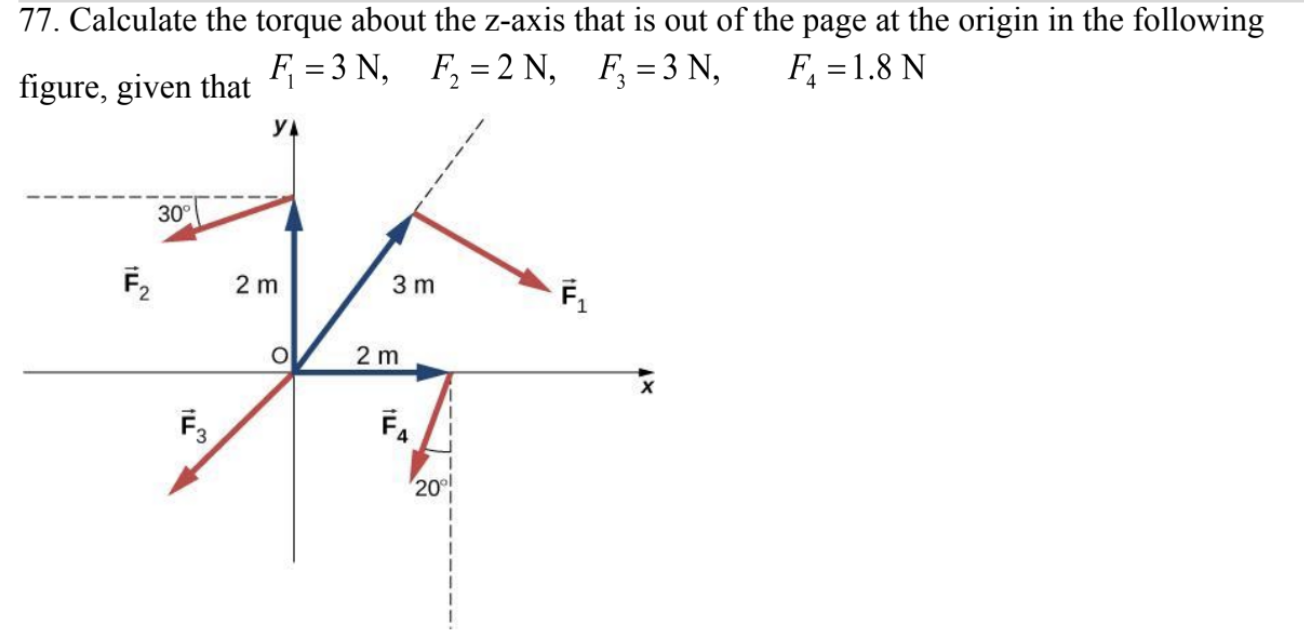

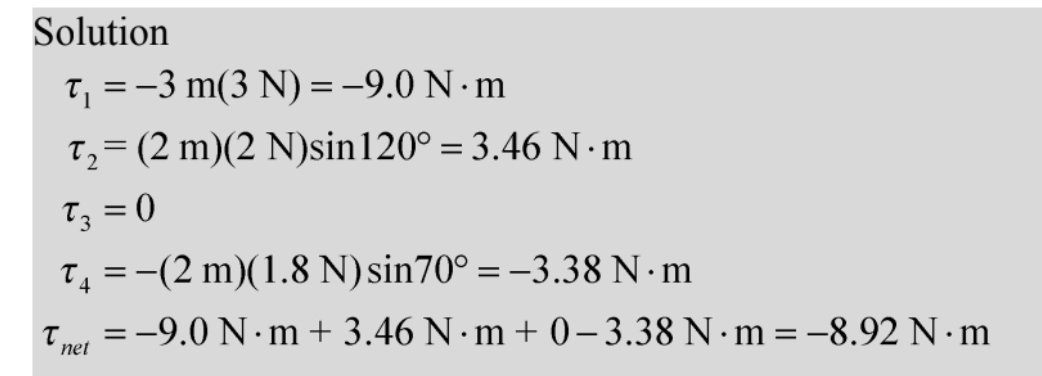

In [20]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_10_Fixed_Axis_Rotation_15/77/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- 2D x–y axes with origin O.
- Three blue position arms from O: 2 m straight up, 2 m to the right, and a 3 m arm into the first quadrant (about 60° above +x).
- Four red forces:
  - F1 = 3 N applied at the end of the 3 m arm, directed down-right along that arm.
  - F2 = 2 N applied at the top of the 2 m vertical arm, pointing left and slightly downward, 30° below the horizontal.
  - F3 = 3 N applied at O along the extension into the third quadrant, pointing down-left.
  - F4 = 1.8 N applied at the end of the 2 m rightward arm, pointing down-left, 20° from the local vertical.


In [21]:
prompt = (
        "Corrections: "
        "Angle is not given for 3 m blue arm [assume it is 45 degree above +x] "
        "Assume that F1 is at angle of 90 degree with 3m blue arm "
    )
resp = chat_turn(prompt)
print(resp)

Updated observations (with your assumptions):
- Coordinate axes with origin O.
- Position arms from O:
  - 2 m straight up (+y).
  - 2 m straight right (+x).
  - 3 m at 45° above +x into the first quadrant.
- Forces (red):
  - F1 = 3 N applied at the end of the 3 m arm, oriented perpendicular to that arm (90° to it); direction is generally down-right relative to the arm’s tip.
  - F2 = 2 N at the top of the 2 m vertical arm, pointing leftward and 30° below the +x axis.
  - F3 = 3 N applied at O along the line into the third quadrant (down-left).
  - F4 = 1.8 N at the end of the 2 m rightward arm, pointing down-left, 20° from the local vertical.


In [22]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

τz = Σ (rx Fy − ry Fx)

Positions:
- r1 = (3 cos45°, 3 sin45°) = (2.121, 2.121) m
- r2 = (0, 2) m
- r4 = (2, 0) m
- r3 at O ⇒ no torque

Forces:
- F1 = 3 N at −45° ⇒ (2.121, −2.121) N
- F2 = 2 N at 210° ⇒ (−1.732, −1.000) N
- F4 = 1.8 N, 20° from vertical pointing down-left ⇒ (−0.616, −1.692) N

Torques:
- τ1 = 2.121(−2.121) − 2.121(2.121) = −9.00 N·m
- τ2 = 0(−1.000) − 2(−1.732) = +3.46 N·m
- τ4 = 2(−1.692) − 0(−0.616) = −3.38 N·m

Total τz = −9.00 + 3.46 − 3.38 ≈ −8.9 N·m.

Answer: τz ≈ −8.9 N·m (into the page; magnitude 8.9 N·m).


In [23]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###115

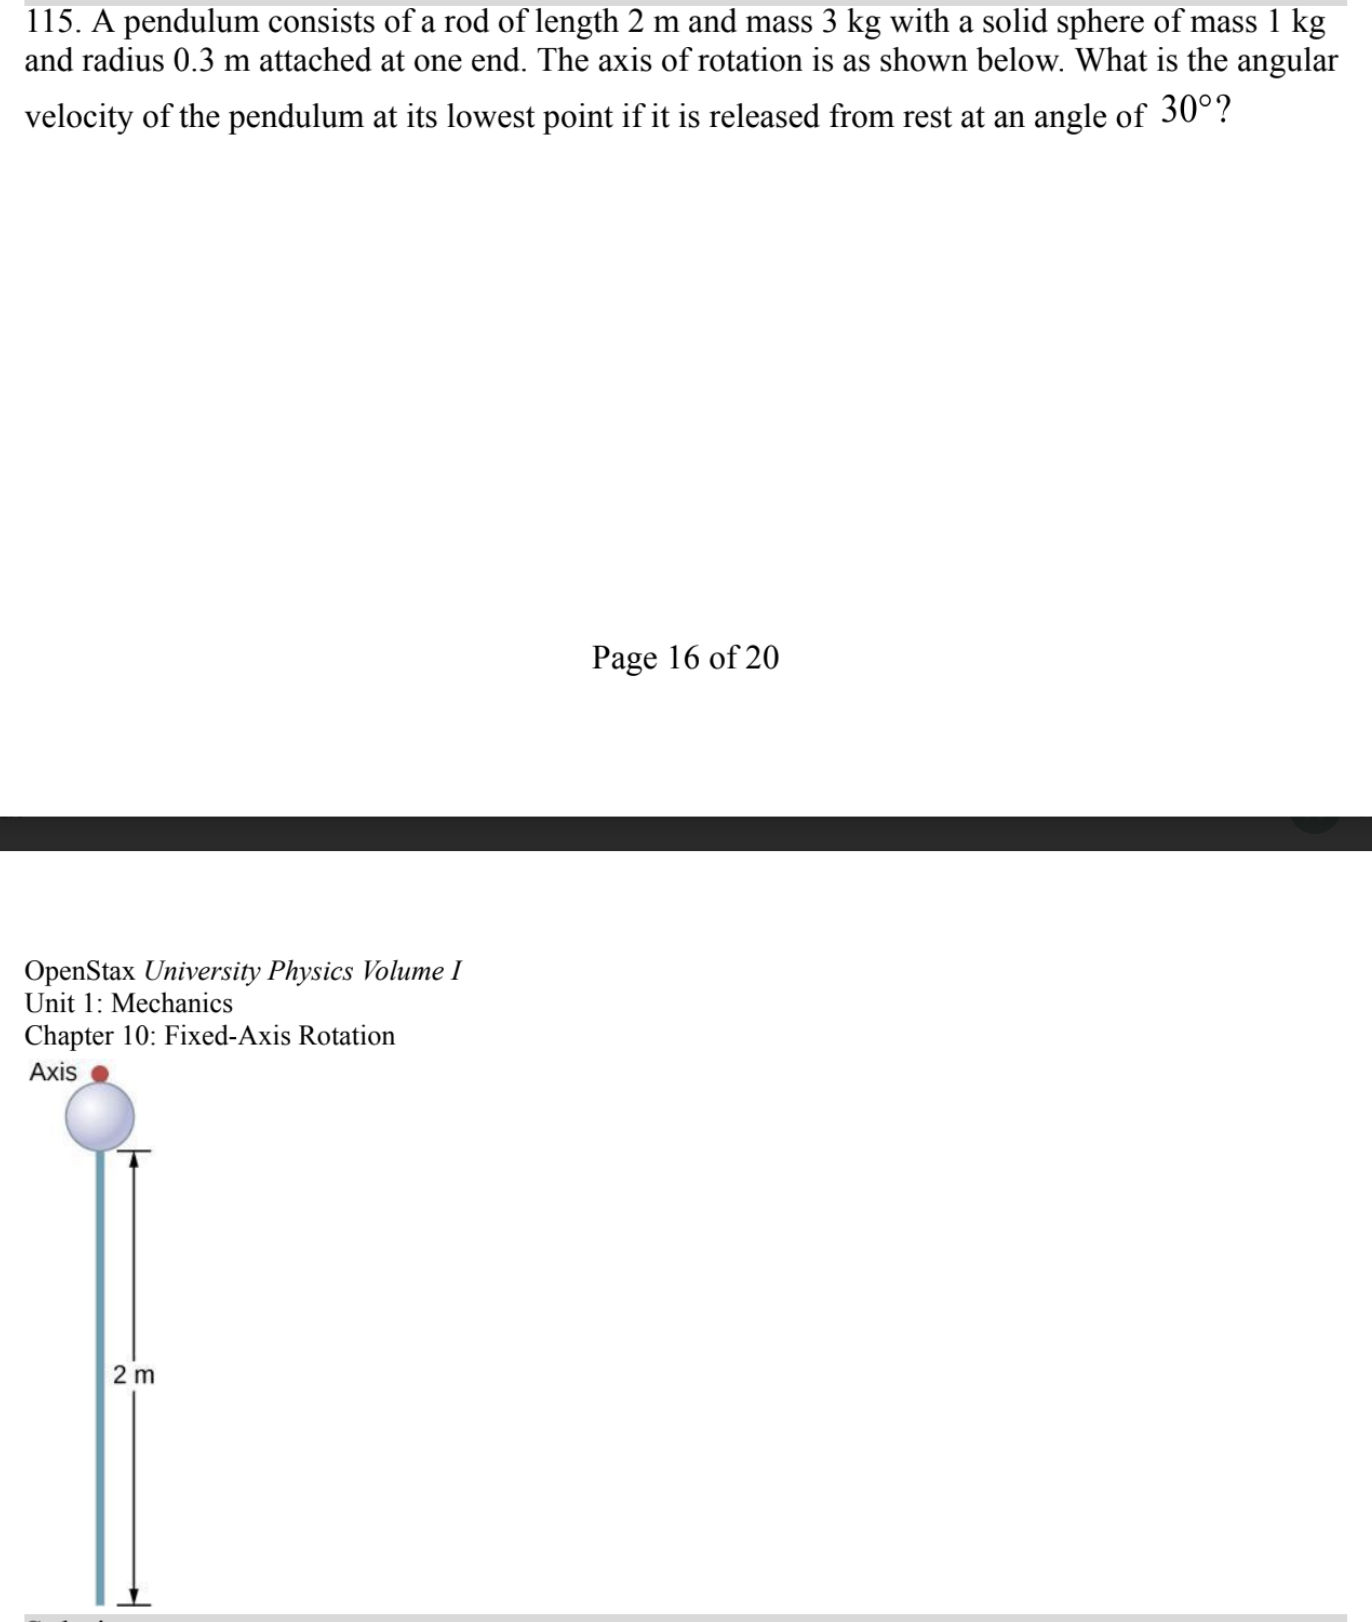

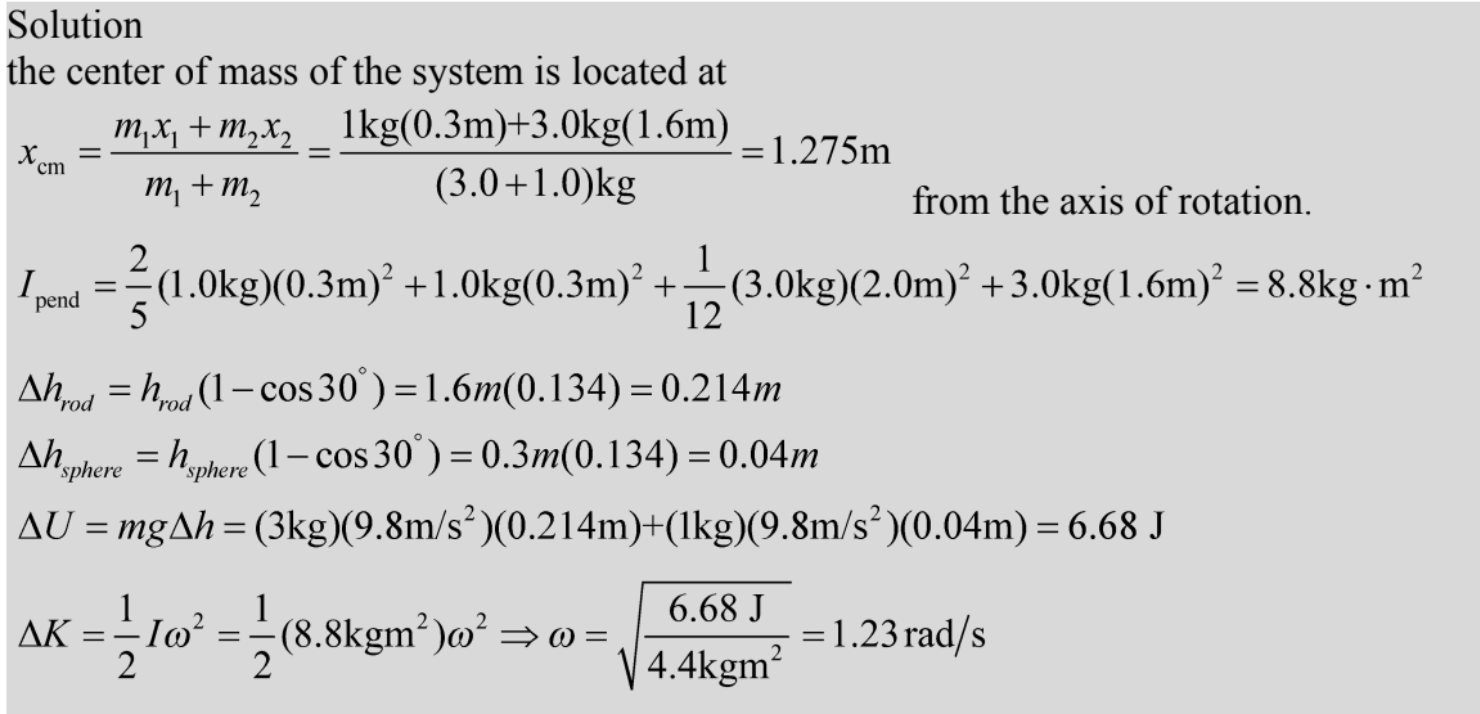

In [29]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_10_Fixed_Axis_Rotation_15/115/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- A vertical, slender rod labeled 2 m long.
- A solid sphere attached at the top end of the rod.
- A small red dot near the top of the sphere labeled “Axis,” indicating the fixed axis of rotation for the pendulum.


In [30]:
prompt = (
        "Corrections: "
        "Correction: The axis of rotation is at the top, touching the top end at the boundary of the sphere. And the rod is attached to the bottom of the sphere. Another way to think is that the entire sphere is between rod and axis of rotation"
    )
resp = chat_turn(prompt)
print(resp)

Got it. The axis is at the very top, tangent to the sphere. The rod attaches to the bottom of the sphere, so the sphere sits between the axis of rotation and the rod. The rod is 2 m long and hangs vertically below the sphere.


In [31]:
prompt = (
        "Solve the question"
    )
resp = chat_turn(prompt)
print(resp)

1.23 rad/s


In [32]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###77

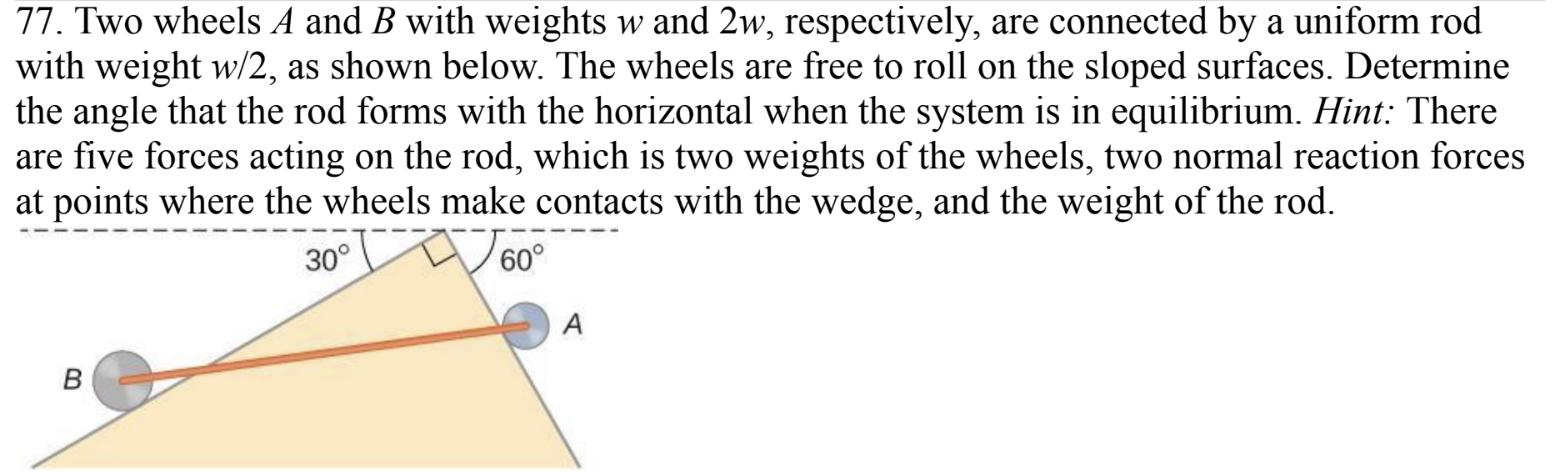

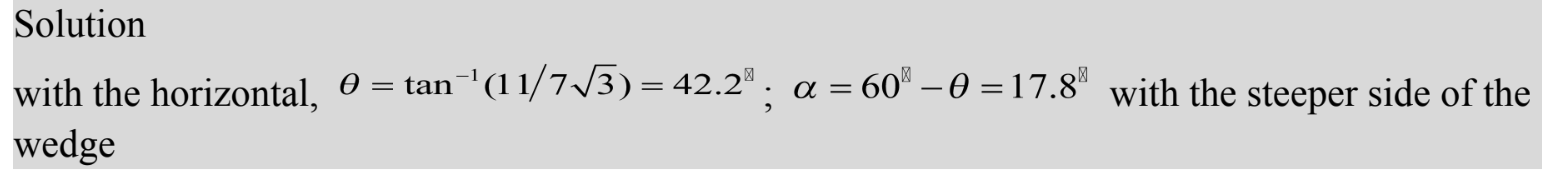

In [36]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_12_Static_Equilibrium_and_Elasticity_13/77/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)

- A wedge with two smooth inclined faces meeting at a right-angled apex; the left face is at 30° to the horizontal and the right face at 60°.  
- Two wheels rest on the faces: wheel B on the left slope, wheel A on the right slope.  
- A straight uniform rod (shown in red) connects the two wheels across the wedge, slanting upward toward the right.  
- A dashed horizontal reference line is drawn above the wedge.


In [ ]:
prompt = (
        "Corrections: "
        "Correction: The axis of rotation is at the top, touching the top end at the boundary of the sphere. And the rod is attached to the bottom of the sphere. Another way to think is that the entire sphere is between rod and axis of rotation"
    )
resp = chat_turn(prompt)
print(resp)

In [38]:
prompt = (
        "Solve the question step-by-step"
    )
resp = chat_turn(prompt)
print(resp)

Observation-based setup
- Let O be the apex of the wedge. The two ground reactions are along the normals to the planes; hence their lines of action are OA and OB. These two lines meet at O.
- For the system to be in equilibrium, the resultant of the remaining forces (the three weights: w at A, 2w at B, and w/2 at the rod’s center C) must pass through the same point O. Therefore, the total weight must act on the vertical through O, i.e. the x-coordinate of the system’s center of mass (with O as origin) must be zero.

Geometry and condition on x-coordinates
- Take the right face at −60° and the left face at +30° to the horizontal. Then:
  x_A = (1/2) r_A,    x_B = −(√3/2) r_B,
  where r_A and r_B are the distances of A and B from O along their faces.
- The rod’s center C has x_C = (x_A + x_B)/2.
- Zero x-moment of all weights about the vertical through O gives:
  w x_A + 2w x_B + (w/2) x_C = 0
  ⇒ (5/4) x_A + (9/4) x_B = 0
  ⇒ 5 x_A + 9 x_B = 0
  ⇒ 5(1/2) r_A + 9[−(√3/2) r_B] = 0
  ⇒ r_A

In [40]:
reset_history()

[{'role': 'system', 'content': [{'type': 'input_text', 'text': ''}]}]

###79

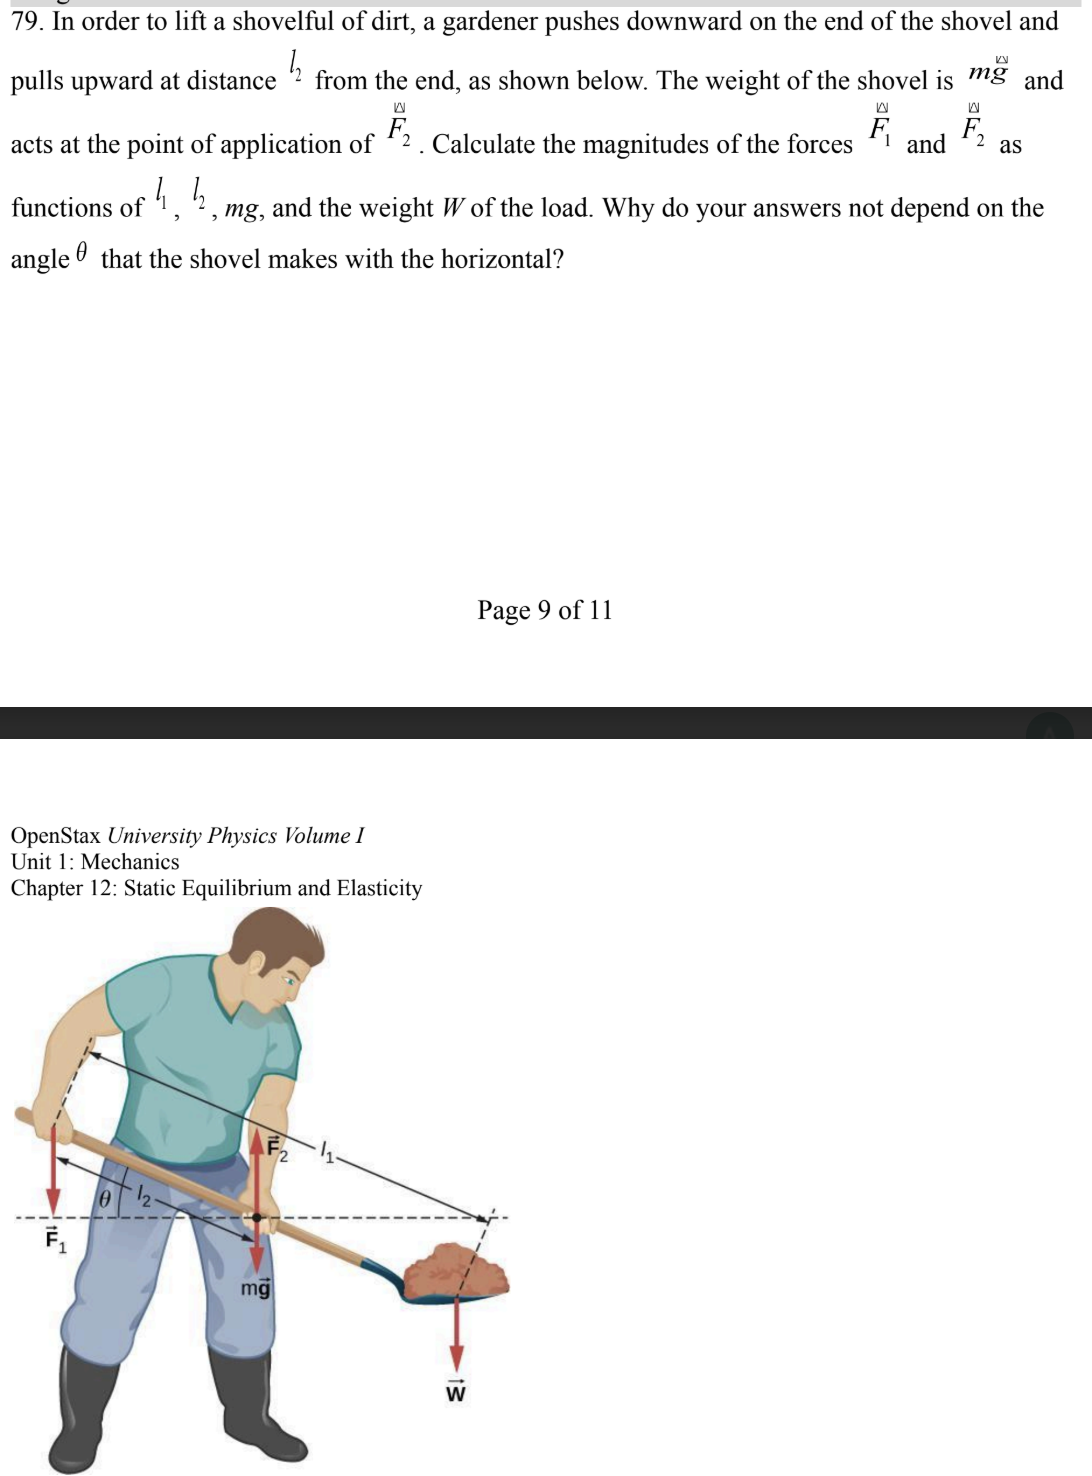

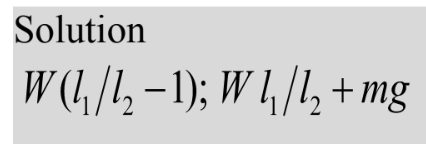

In [ ]:
img_path = "/content/drive/MyDrive/Medhavi AI/Physics QA Datasets/Diagram_Essential_Questions/Chapter_12_Static_Equilibrium_and_Elasticity_13/77/q.png"
resp = chat_turn("Describe what you observe in the figure", image_paths=[img_path])
print(resp)